# Federated PCA Comparison with Centralized Plink PCA

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nodes = ['AFR', 'SAS', 'EUR', 'AMR', 'EAS']

colors = {
    'AFR': 'black',
    'SAS': 'blue',
    'EUR': 'red',
    'AMR': 'green',
    'EAS': 'grey'
}

def read_evectors_from_sscore(file):
    sscore = pd.read_csv(file, sep='\t', header=0)
    return sscore[sscore.columns[3:]]

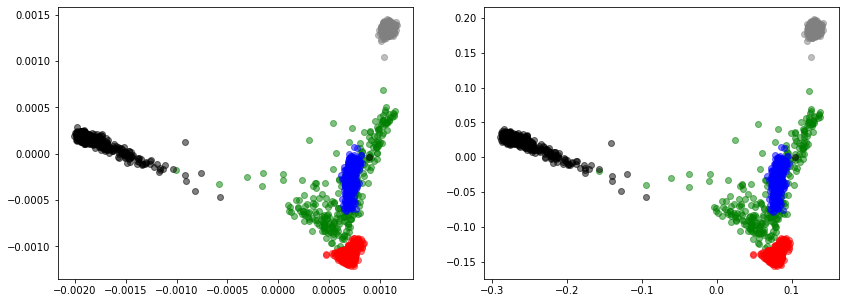

In [14]:
fold = 0
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(14, 5))

x, y = 0, 1

# Federated PCA
for node in nodes[::-1]:
    file = os.path.join(
        '/mnt/genx-bio-share/TG/data/chip/superpop_split', 'federated_pca',
        node, f'fold_{fold}_train_projections.csv.eigenvec.sscore'
    )

    evectors = read_evectors_from_sscore(file)
    ax_left.scatter(evectors.iloc[:, [x]], evectors.iloc[:, [y]], c=colors[node], alpha=0.5)

for node in nodes[::-1]:
    file = os.path.join(
        '/mnt/genx-bio-share/TG/data/chip/superpop_split', 'pca',
        node, f'fold_{fold}_train_projections.csv.eigenvec.sscore'
    )

    evectors = read_evectors_from_sscore(file)
    ax_right.scatter(evectors.iloc[:, [x]], evectors.iloc[:, [y]], c=colors[node], alpha=0.5)

plt.show()